# >>>>>>>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/2020-brfss-survey-responses.csv')

In [3]:
data.head()

,FIPS,ST,X_URBSTAT,X_AGEG5YR,DISPCODE,NUMADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,...,AVEDRNK3,DRNK3GE5,SEATBELT,HADMAM,PSATEST1,COLNSCPY,HIVTST7,HIVRISK5,X_LLCPWT,X_AAWEIGHT
0,1,AL,1.0,11,1100,1.0,2,3.0,88.0,88.0,...,88.0,4.0,1.0,1.0,NaN,1.0,1.0,2.0,351.425067,203.906248
1,1,AL,1.0,12,1100,3.0,1,5.0,10.0,88.0,...,NaN,NaN,1.0,NaN,2.0,1.0,2.0,2.0,717.647873,383.539091
2,1,AL,1.0,13,1200,1.0,2,3.0,5.0,88.0,...,NaN,NaN,1.0,1.0,NaN,1.0,2.0,NaN,2207.021300,1538.325330
3,1,AL,1.0,10,1100,2.0,2,4.0,3.0,3.0,...,NaN,NaN,1.0,1.0,NaN,1.0,2.0,2.0,785.062265,462.564229
4,1,AL,1.0,13,1100,1.0,2,2.0,88.0,88.0,...,NaN,NaN,1.0,1.0,NaN,1.0,2.0,2.0,327.589761,228.334737


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 51 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FIPS        401958 non-null  int64  
 1   ST          394831 non-null  object 
 2   X_URBSTAT   394831 non-null  float64
 3   X_AGEG5YR   401958 non-null  int64  
 4   DISPCODE    401958 non-null  int64  
 5   NUMADULT    124742 non-null  float64
 6   SEXVAR      401958 non-null  int64  
 7   GENHLTH     401950 non-null  float64
 8   PHYSHLTH    401953 non-null  float64
 9   MENTHLTH    401953 non-null  float64
 10  HLTHPLN1    401955 non-null  float64
 11  EXERANY2    401955 non-null  float64
 12  SLEPTIM1    401955 non-null  float64
 13  CVDINFR4    401952 non-null  float64
 14  CVDCRHD4    401955 non-null  float64
 15  CVDSTRK3    401955 non-null  float64
 16  ASTHMA3     401955 non-null  float64
 17  CHCSCNCR    401955 non-null  float64
 18  CHCOCNCR    401955 non-null  float64
 19  CH

In [5]:
data.describe()

,FIPS,X_URBSTAT,X_AGEG5YR,DISPCODE,NUMADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,...,AVEDRNK3,DRNK3GE5,SEATBELT,HADMAM,PSATEST1,COLNSCPY,HIVTST7,HIVRISK5,X_LLCPWT,X_AAWEIGHT
count,401958.000000,394831.000000,401958.000000,401958.000000,124742.000000,401958.000000,401950.000000,401953.000000,401953.000000,401955.000000,...,190859.000000,190332.000000,376447.000000,203520.000000,125915.000000,258555.000000,367921.000000,366026.000000,401958.000000,394831.000000
mean,30.010359,1.149692,7.667363,1117.747874,1.752120,1.542385,2.452947,66.143629,61.453740,1.119809,...,4.077251,66.371015,1.258557,1.255921,1.824382,1.339429,1.941884,1.996350,647.849949,737.624631
std,15.773473,0.356770,3.660209,38.207382,0.816289,0.498201,1.085778,34.827121,36.951143,0.562472,...,12.342536,36.537959,0.844678,0.617191,1.390534,0.715403,1.281266,0.531705,1418.402069,1767.824851
min,1.000000,1.000000,1.000000,1100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.958278,0.000000
25%,18.000000,1.000000,5.000000,1100.000000,1.000000,1.000000,2.000000,30.000000,15.000000,1.000000,...,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,113.404274,84.209716
50%,29.000000,1.000000,8.000000,1100.000000,2.000000,2.000000,2.000000,88.000000,88.000000,1.000000,...,2.000000,88.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,282.287914,254.071714
75%,41.000000,1.000000,11.000000,1100.000000,2.000000,2.000000,3.000000,88.000000,88.000000,1.000000,...,3.000000,88.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,663.936641,709.870264
max,72.000000,2.000000,14.000000,1200.000000,18.000000,2.000000,9.000000,99.000000,99.000000,9.000000,...,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,83193.322100,101760.155381


# Pre-processing 

In [6]:
#Check percentage of missing values in each columns
missing_percentage = {col:data[col].isna().sum()/len(data[col]) for col in data.columns}
# Create DataFrame from the first dictionary
df = pd.DataFrame([missing_percentage]).T
df.columns = ['%_missing']

df = df.sort_values(by= '%_missing', ascending= False)
df

,%_missing
DIABAGE3,0.870399
STOPSMK2,0.869581
PREGNANT,0.811946
NUMADULT,0.689664
PSATEST1,0.686746
SMOKDAY2,0.610322
DRNK3GE5,0.526488
AVEDRNK3,0.525177
HADMAM,0.493678
COLNSCPY,0.356761


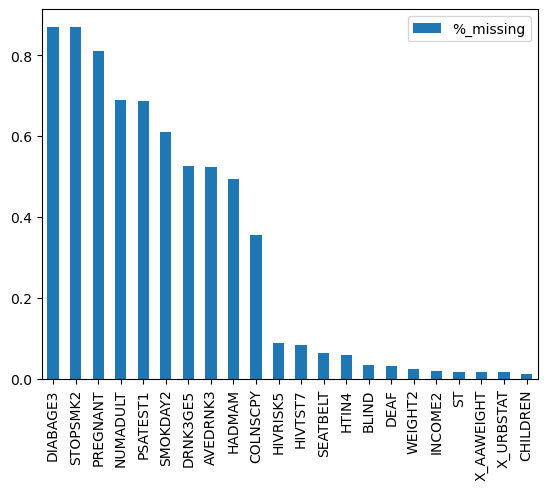

In [7]:
df[df['%_missing'] > 0.01].plot(kind='bar');

In [8]:
# Drop columns with high missing values
drop_columns = ['DIABAGE3', 'STOPSMK2', 'PREGNANT', 'NUMADULT', 'PSATEST1', 'SMOKDAY2', 
                 'DRNK3GE5', 'AVEDRNK3', 'HADMAM', 'COLNSCPY']

# Drop the columns
data.drop(columns= drop_columns, inplace= True)
data.shape

(401958, 41)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FIPS        401958 non-null  int64  
 1   ST          394831 non-null  object 
 2   X_URBSTAT   394831 non-null  float64
 3   X_AGEG5YR   401958 non-null  int64  
 4   DISPCODE    401958 non-null  int64  
 5   SEXVAR      401958 non-null  int64  
 6   GENHLTH     401950 non-null  float64
 7   PHYSHLTH    401953 non-null  float64
 8   MENTHLTH    401953 non-null  float64
 9   HLTHPLN1    401955 non-null  float64
 10  EXERANY2    401955 non-null  float64
 11  SLEPTIM1    401955 non-null  float64
 12  CVDINFR4    401952 non-null  float64
 13  CVDCRHD4    401955 non-null  float64
 14  CVDSTRK3    401955 non-null  float64
 15  ASTHMA3     401955 non-null  float64
 16  CHCSCNCR    401955 non-null  float64
 17  CHCOCNCR    401955 non-null  float64
 18  CHCCOPD2    401953 non-null  float64
 19  HA

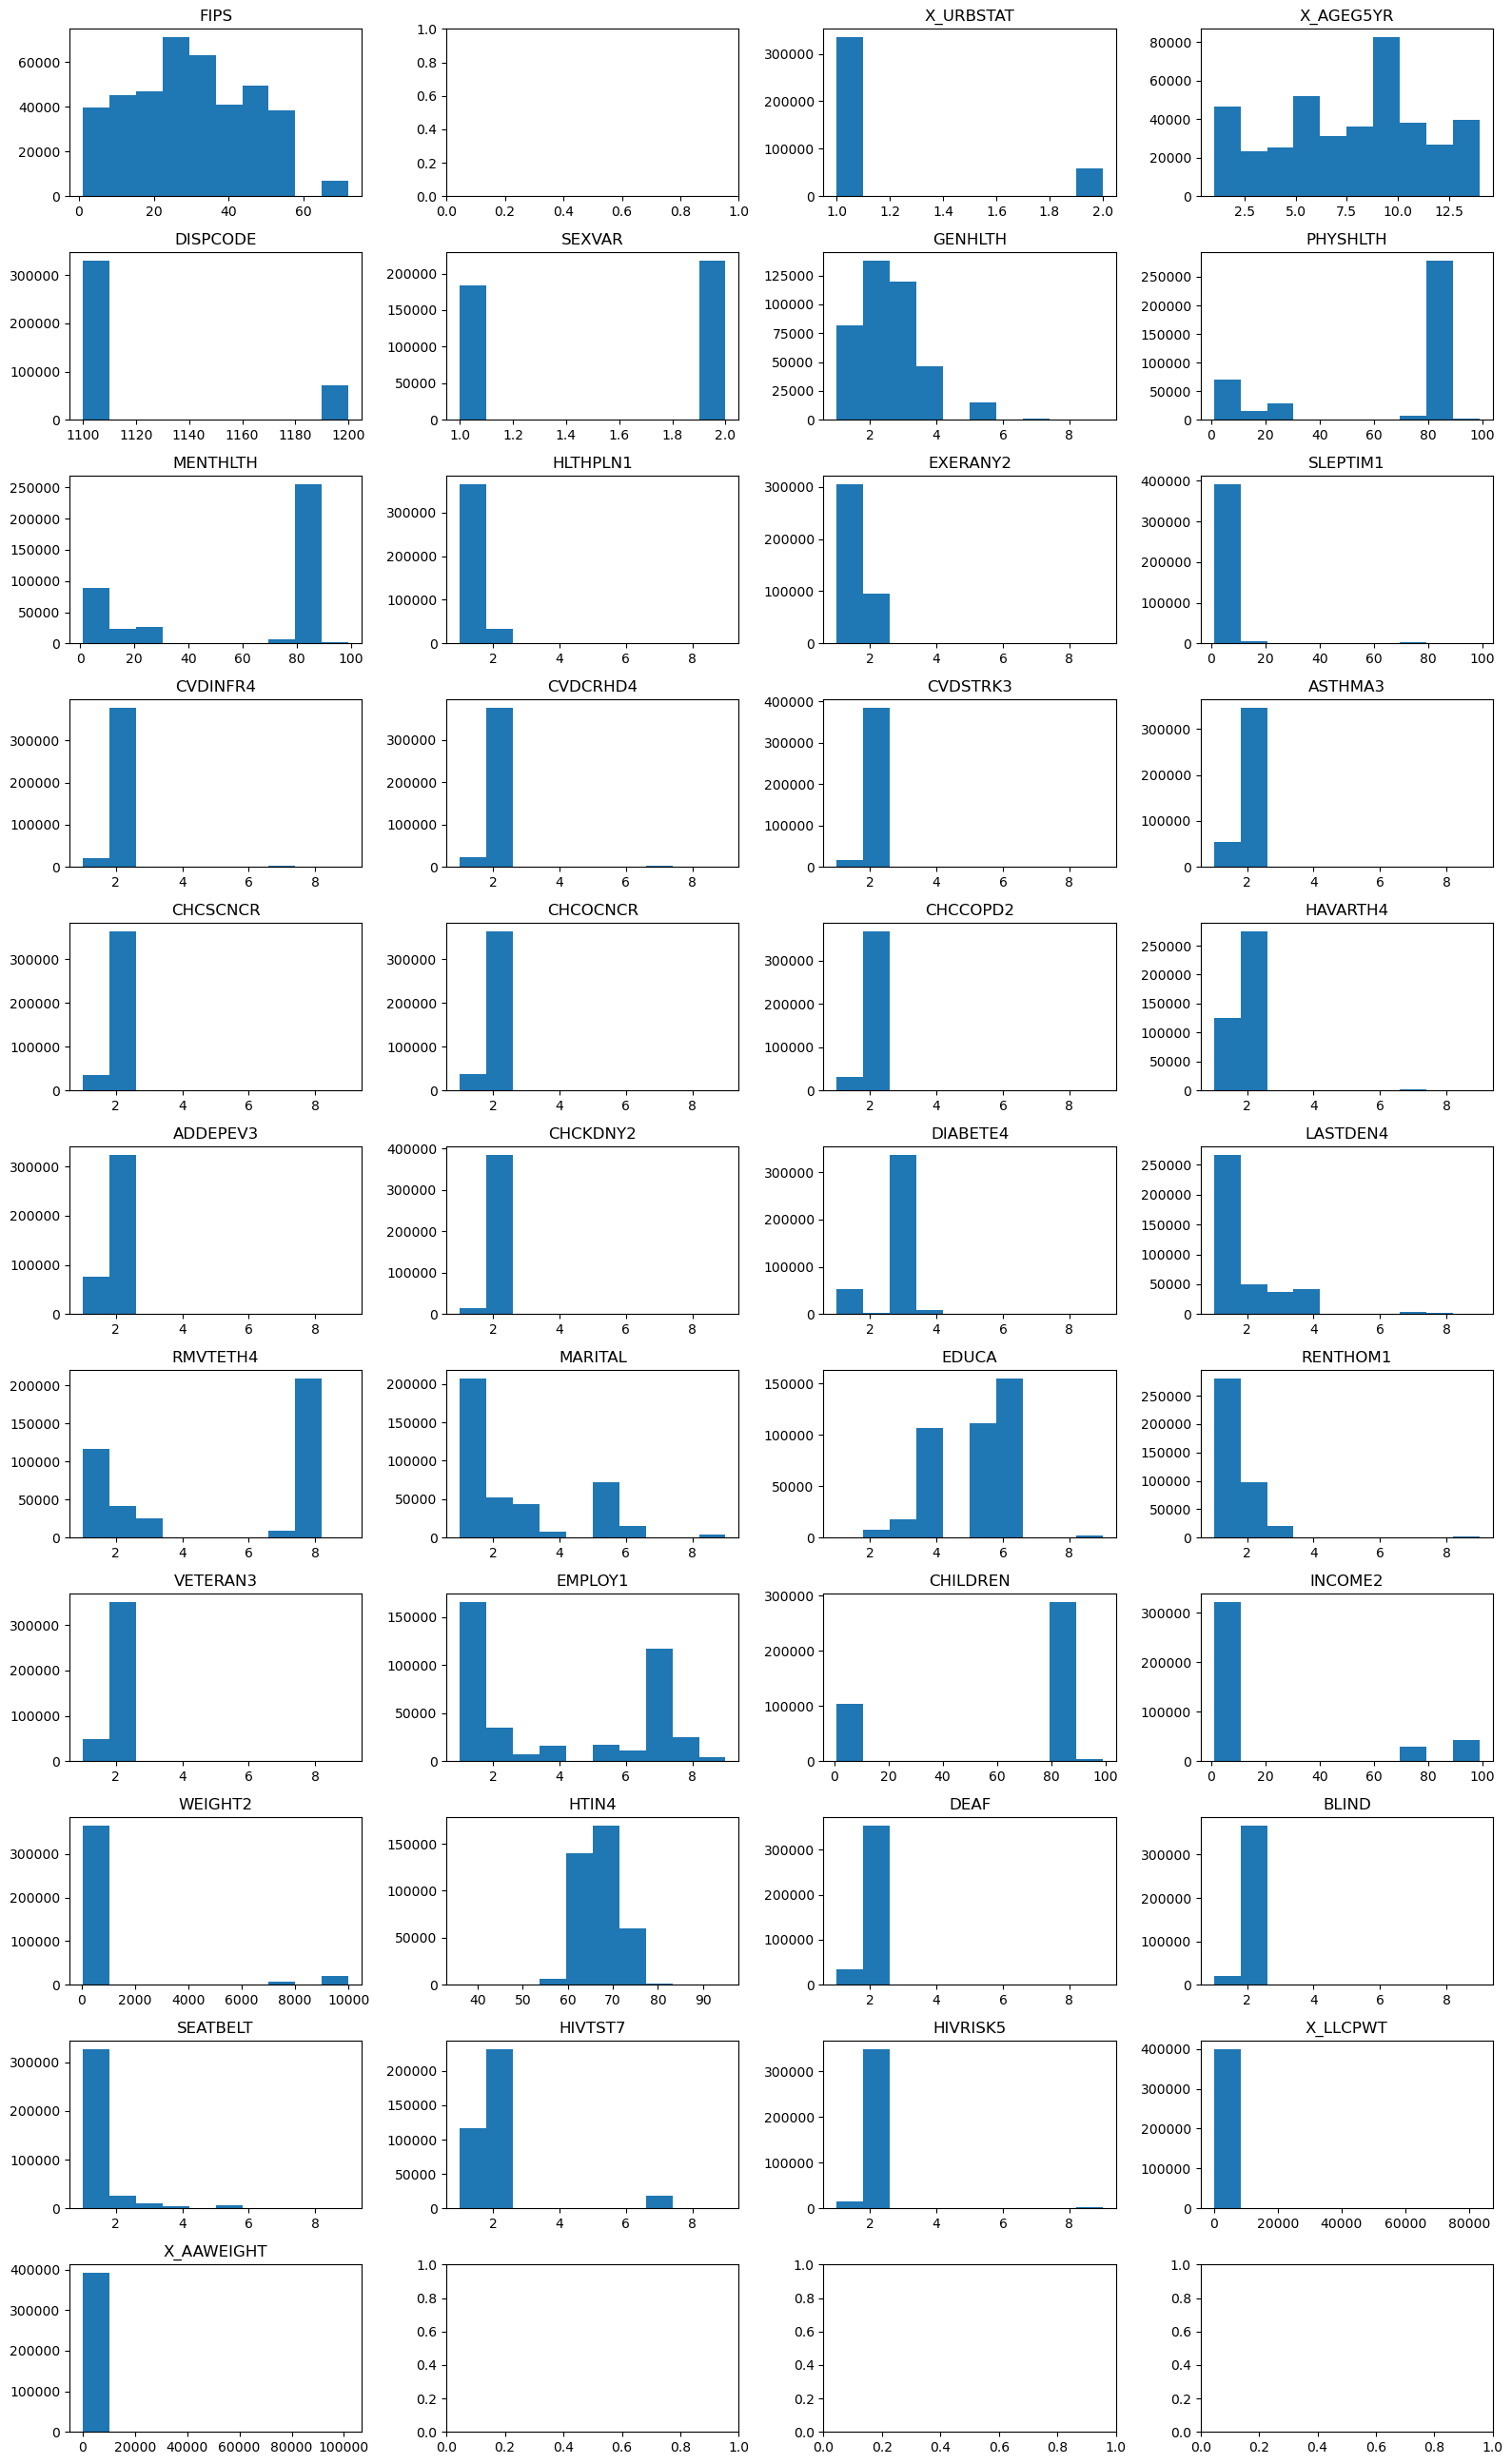

In [10]:
# View columns plots

fig, axes = plt.subplots(11, 4, figsize=(16, 26))  # Adjust the figsize as needed

for i in range(11):  # Iterate over the rows
    for j in range(4):  # Iterate over the columns
        col_index = i * 4 + j
        if col_index < len(data.columns):# Check if column index is within the range of columns
            column_name = data.columns[col_index]
            if column_name == 'ST':
                continue
            axes[i, j].hist(data[column_name])
            axes[i, j].set_title(column_name)  # Set subplot title as column name

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [11]:
# drop ST column since it's a redundancy of FIPS
data.drop(columns= 'ST', inplace= True)

In [12]:
# Check indices with missing values for target variables
nan_indices = data[data[['CHCSCNCR', 'CHCOCNCR']].isna().any(axis=1)].index

In [13]:
# Drop the rows with misssing values in out target variable above
data.drop(nan_indices, inplace=True)
data.reset_index(drop=True, inplace=True)

In [14]:
# Split data into predictor variables (X) and target variables (y)
X = data.drop(columns= ['CHCSCNCR', 'CHCOCNCR'])
y = data[['CHCSCNCR', 'CHCOCNCR']].copy()

In [15]:
# Feature Engineering
## Combine y into a target with one column

y.loc[:, 'CHC_CNCR'] = 99  # Default uncertain value
y.loc[(data['CHCSCNCR'] == 1) | (data['CHCOCNCR'] == 1), 'CHC_CNCR'] = 1  # Indicates potential cancer
y.loc[(data['CHCSCNCR'] == 2) & (data['CHCOCNCR'] == 2), 'CHC_CNCR'] = 2  # Indicates no cancer
y.head()

/var/folders/6s/tl4bp6ld5hn0_f_lz0b38n780000gn/T/ipykernel_1924/2237781118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, 'CHC_CNCR'] = 99  # Default uncertain value


,CHCSCNCR,CHCOCNCR,CHC_CNCR
0,2.0,2.0,2
1,1.0,2.0,1
2,2.0,2.0,2
3,1.0,2.0,1
4,2.0,2.0,2


In [16]:
y = y.drop(columns= ['CHCSCNCR', 'CHCOCNCR'])
y.head()

,CHC_CNCR
0,2
1,1
2,2
3,1
4,2


In [17]:
# Convert weights given in kgs back to pounds

def convert_kg_to_lb(weight_kg):
    # Conversion factor from kilograms to pounds
    conversion_factor = 2.20462
    # Convert kilograms to pounds
    weight_lb = weight_kg * conversion_factor
    return weight_lb

def convert_back_to_pounds(weight_code):
    # Extract the numerical part after '9'
    weight_kg = int(str(weight_code)[1:].split('.')[0])
    # Convert kilograms to pounds
    weight_lb = convert_kg_to_lb(weight_kg)
    return weight_lb

# Define a function to apply to each value in the 'WEIGHT2' column
def apply_conversion(weight_code):
    if 9023 <= weight_code <= 9352:
        return convert_back_to_pounds(weight_code)
    else:
        return weight_code  # Keep the original value if not in the specified range

In [18]:
# Apply the function to the 'WEIGHT2' column using map
X['WEIGHT2'] = X['WEIGHT2'].map(apply_conversion)

# Train-test Split

In [19]:
from sklearn.model_selection import train_test_split

#Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

### Handling missing Values

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [21]:
# List of non-categorical columns
non_cat_columns = ['PHYSHLTH', 'SLEPTIM1', 'CHILDREN', 'WEIGHT2', 'HTIN4']

In [22]:
# Separate categorical and numerical features
#X_train_cat = X_train.drop(columns=non_cat_columns)
#X_train_num = X_train[non_cat_columns]

# Imputation for categorical columns
#imputer_classifier = IterativeImputer(estimator=RandomForestClassifier(), max_iter=1)
#X_train_cat_imputed = pd.DataFrame(imputer_classifier.fit_transform(X_train_cat), columns=X_train_cat.columns)

# Imputation for numerical columns
#imputer_regressor = IterativeImputer(estimator=RandomForestRegressor(), max_iter=1)
#X_train_num_imputed = pd.DataFrame(imputer_regressor.fit_transform(X_train_num), columns=X_train_num.columns)

# Concatenate imputed categorical and numerical columns
#X_train_imputed = pd.concat([X_train_cat_imputed, X_train_num_imputed], axis=1)

In [23]:
#Instantiate KNN imputer
knn_imputer = KNNImputer(n_neighbors= 100, weights= 'distance')

# Fit to X_train data
knn_imputer.fit(X_train)

# Impute missing values on X_train dataset
X_train_imputed = pd.DataFrame(knn_imputer.transform(X_train), columns= X_train.columns)

In [25]:
# Impute missing values on X_test dataset
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns= X_test.columns)

In [32]:
# Check number of unique values in the non-categorical columns to provide insights on whether to one-hot-encode
{col:len(X_train_imputed[col].value_counts()) for col in X_train_imputed[non_cat_columns].columns}

{'PHYSHLTH': 35,
 'SLEPTIM1': 26,
 'CHILDREN': 3584,
 'WEIGHT2': 7948,
 'HTIN4': 17897}

In [33]:
X_train_imputed['PHYSHLTH'].value_counts()

PHYSHLTH
88.000000    209148
30.000000     18795
2.000000      13329
1.000000       9375
3.000000       7789
5.000000       6868
77.000000      5239
10.000000      5019
15.000000      4679
7.000000       4278
4.000000       4062
20.000000      3011
14.000000      2638
99.000000      1189
6.000000       1156
25.000000      1103
8.000000        891
21.000000       587
12.000000       542
28.000000       410
29.000000       205
9.000000        181
18.000000       165
16.000000       131
27.000000       123
17.000000        95
13.000000        89
22.000000        79
11.000000        77
24.000000        68
26.000000        59
23.000000        46
19.000000        38
68.337904         1
66.866138         1
Name: count, dtype: int64